<a href="https://colab.research.google.com/github/JonathanCristovao/visao-computacional/blob/main/1_preprocessamento_e_selecao_atributos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 Pré processamento de imagens com OpenCV

* Usando a biblioteca OpenCV e/ou scikit-image, podemos extrair vários atributos de uma imagem. Esse atributos podem ser usados para treinar modelos de machine learning ou para a segmentação de imagens com o K-Means. Esses atributos podem incluir características de cor, textura, forma, e mais.

In [ ]:
# Caso necessario, instale a biblioteca openCV removendo o # e executando a linha.
#!pip install opencv-python

In [ ]:
# pacotes necessarios para as atividades
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure, io, feature
from skimage.feature import hog

### 1.1 Leitura da imagem

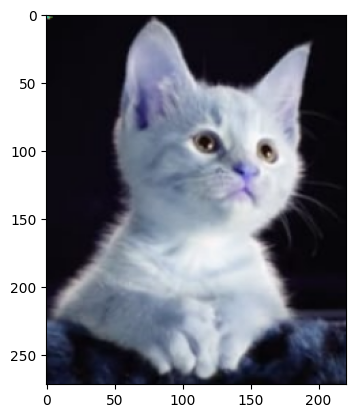

In [ ]:
# lendo a imagem
imagem = cv2.imread('gato.png')
plt.imshow(imagem)
plt.show()

Observacao: cv2.imread faz a leitura dos canais RGB invertidos, com isso precisamos converte-los para o formato natural da imagem.


### 1.2 Conversão da imagem BGR



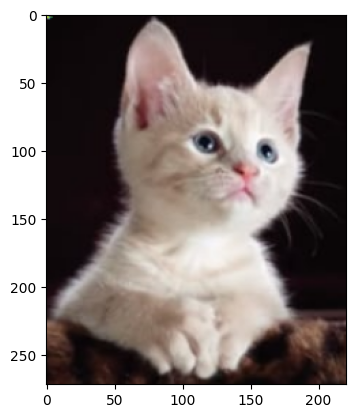

(272, 221, 3)


In [ ]:
image = cv2.imread('gato.png')
image_rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.show()
print(image_rgb.shape)

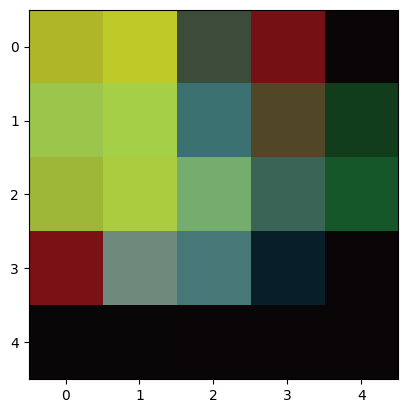

Valores dos pixels:
 [[[175 183  41]
  [189 202  40]
  [ 60  75  58]
  [117  16  21]
  [ 10   6   7]]

 [[155 198  75]
  [164 207  71]
  [ 59 113 112]
  [ 81  71  38]
  [ 18  61  29]]

 [[159 183  57]
  [172 204  64]
  [116 173 109]
  [ 58 101  86]
  [ 21  87  40]]

 [[121  17  21]
  [110 138 125]
  [ 71 120 119]
  [  8  30  41]
  [ 10   6   7]]

 [[  8   6   7]
  [  9   6   7]
  [ 10   6   7]
  [ 10   6   7]
  [ 10   6   7]]]


In [ ]:
plt.imshow(image_rgb[:5, :5])
plt.show()

print("Valores dos pixels:\n",image_rgb[:5, :5])

Teste a cor no site: https://www.colorabout.com/color/rgb/

### 1.3 Converter para escala de cinzas:

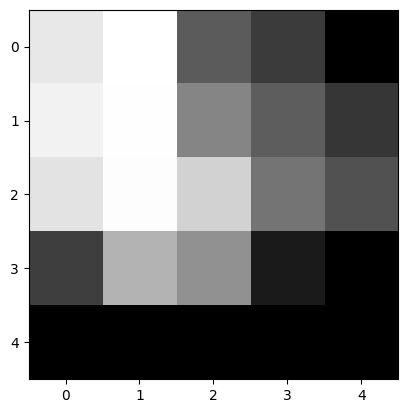

Valores dos pixels:
 [[164 180  69  47   7]
 [171 179  97  70  44]
 [161 178 149  86  62]
 [ 49 128 105  25   7]
 [  7   7   7   7   7]]


In [ ]:
img = cv2.imread('gato.png') # Podemos remover a segunda linha e modificar a leitura da imagem para cv2.imread('gato.png',0)
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray[:5, :5], cmap='gray')
plt.show()

print("Valores dos pixels:\n", img_gray[:5, :5])


## 2.Preprocessamento

#### 2.1 Redimensionamento da imagem



In [ ]:
img = cv2.imread('gato.png', 0)
print('Dimensões da imagem original:',img.shape)

Dimensões da imagem original: (272, 221)


Novas dimensões da imagem: (20, 20)


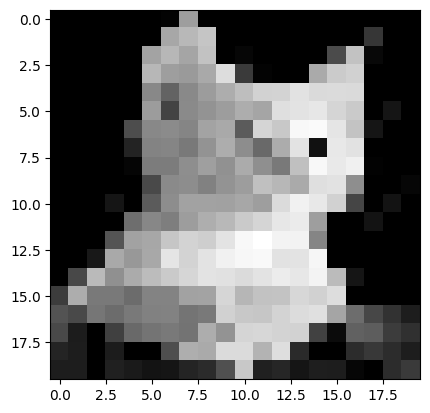

In [ ]:
img = cv2.imread('gato.png', 0)

# Definir a nova dimensão (largura, altura)
new_size = (20, 20)  # Exemplo: Redimensionar para 20x20 pixels

# Redimensionar as imagens
image_cat_resized = cv2.resize(img, new_size)
print('Novas dimensões da imagem:',image_cat_resized.shape)
plt.imshow(image_cat_resized, cmap='gray')
plt.show()

# 2 Histogramas

### 2.1 Histograma Escala de Cinza

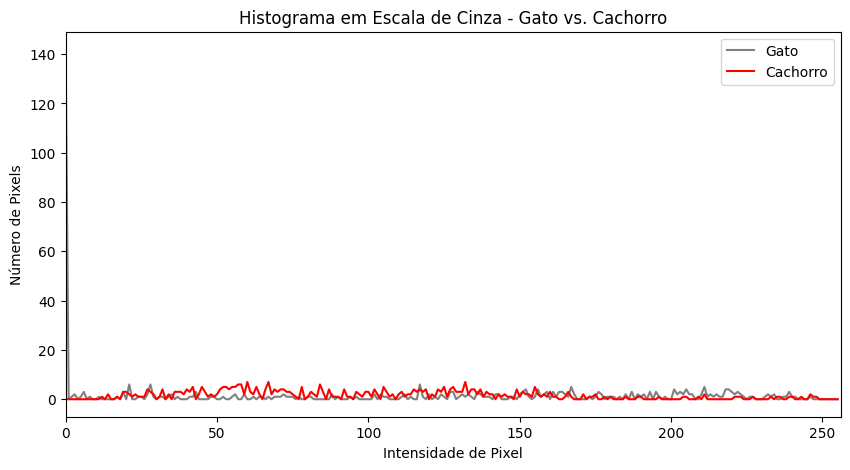

In [ ]:
# Carregar as imagens em escala de cinza
new_size = (20, 20)
image_cat_gray = cv2.resize(cv2.imread('gato.png', 0), new_size)
image_dog_gray = cv2.resize(cv2.imread('cachorro.jpg', 0), new_size)

# Criar a figura para os histogramas
plt.figure(figsize=(10, 5))

# Histograma para a imagem do gato
hist_cat = cv2.calcHist([image_cat_gray], [0], None, [256], [0, 256])
plt.plot(hist_cat, color='gray', label='Gato')

# Histograma para a imagem do cachorro
hist_dog = cv2.calcHist([image_dog_gray], [0], None, [256], [0, 256])
plt.plot(hist_dog, color='red', label='Cachorro')

# Configurações do gráfico
plt.title('Histograma em Escala de Cinza - Gato vs. Cachorro')
plt.xlabel('Intensidade de Pixel')
plt.ylabel('Número de Pixels')
plt.xlim([0, 256])
plt.legend(loc='upper right')

# Mostrar o gráfico
plt.show()

### 2.2 Histograma dos canais RGB

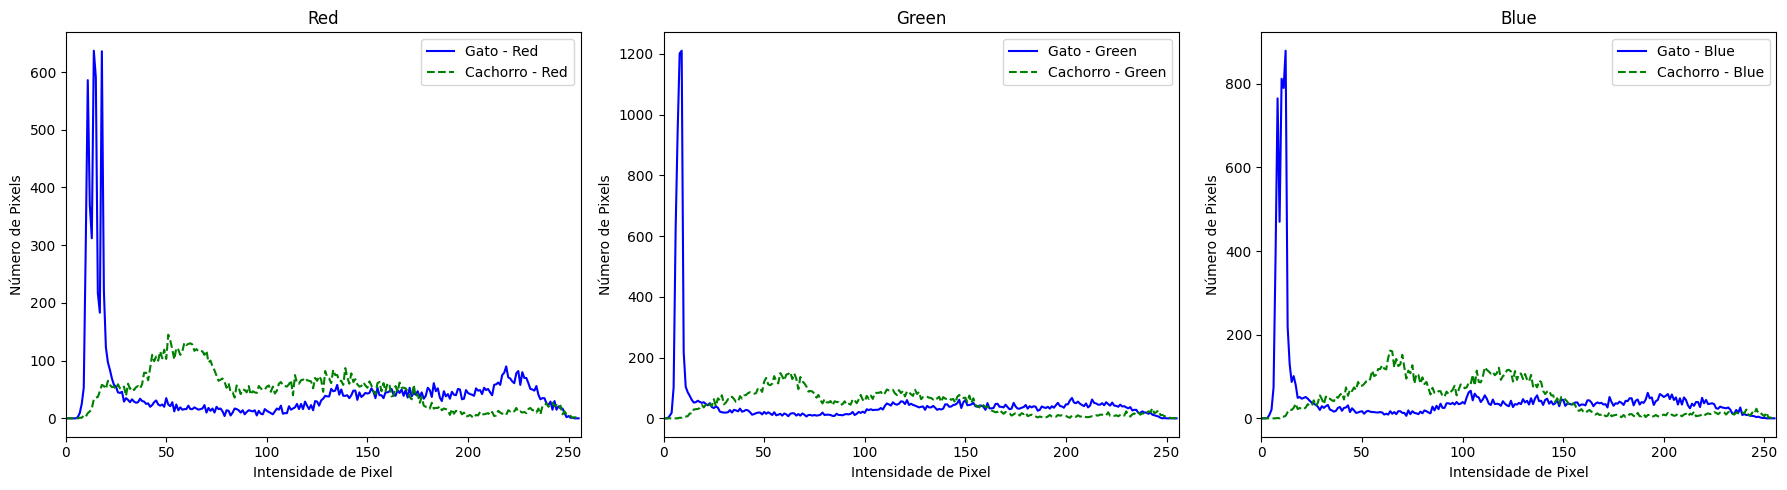

In [ ]:
new_size = (110, 110)

# Carregar as imagens
image_cat = cv2.resize(cv2.imread('gato.png'), new_size)
image_dog = cv2.resize(cv2.imread('cachorro.jpg'), new_size)

# Converter as imagens de BGR para RGB
image_cat_rgb = cv2.cvtColor(image_cat, cv2.COLOR_BGR2RGB)
image_dog_rgb = cv2.cvtColor(image_dog, cv2.COLOR_BGR2RGB)

# Nome dos canais RGB
channels = ('Red', 'Green', 'Blue')

# Criar subplots para cada canal
plt.figure(figsize=(18, 5))

for i, channel in enumerate(channels):
    plt.subplot(1, 3, i + 1)

    # Calcular o histograma para o canal específico da imagem do gato
    hist_cat = cv2.calcHist([image_cat_rgb], [i], None, [256], [0, 256])
    plt.plot(hist_cat, color='blue', label=f'Gato - {channel}')

    # Calcular o histograma para o canal específico da imagem do cachorro
    hist_dog = cv2.calcHist([image_dog_rgb], [i], None, [256], [0, 256])
    plt.plot(hist_dog, color='green', linestyle='dashed', label=f'Cachorro - {channel}')

    plt.title(f'{channel}')
    plt.xlabel('Intensidade de Pixel')
    plt.ylabel('Número de Pixels')
    plt.xlim([0, 256])
    plt.legend(loc='upper right')

# Mostrar os gráficos
plt.tight_layout()
plt.show()


### 2.3 Histograma no espaço HSV

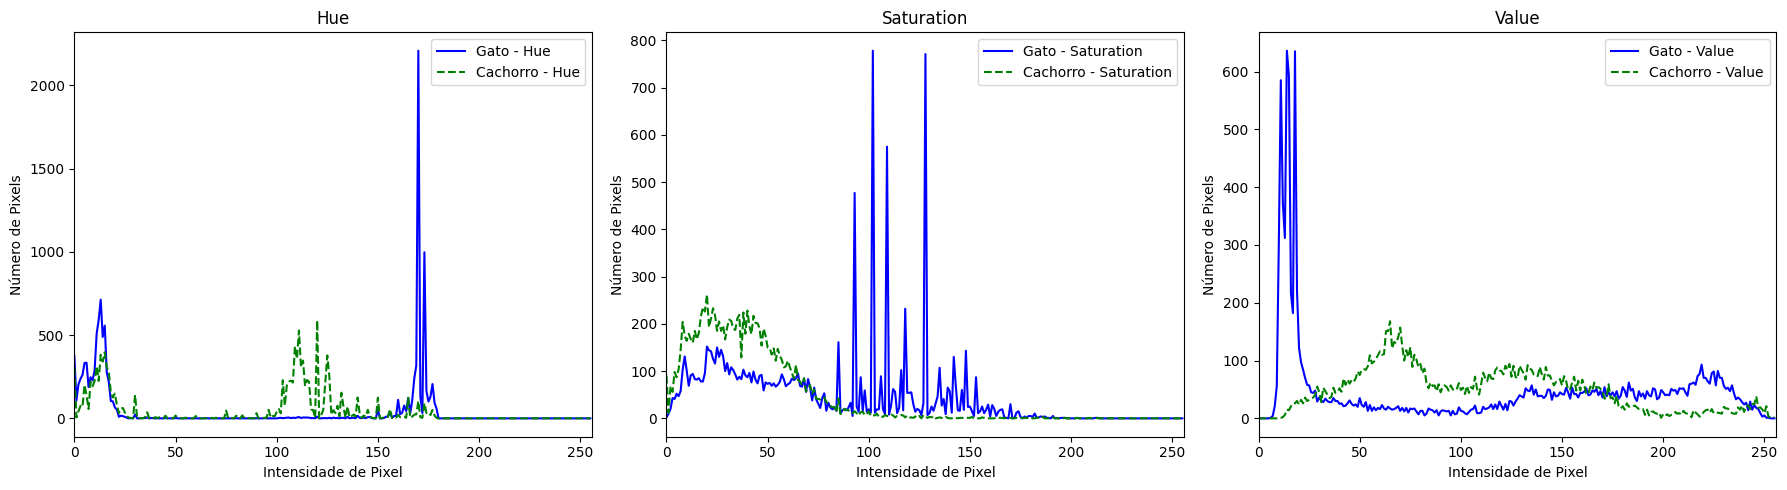

In [ ]:
new_size = (110, 110)

# Carregar as imagens
image_cat = cv2.resize(cv2.imread('gato.png'), new_size)
image_dog = cv2.resize(cv2.imread('cachorro.jpg'), new_size)

# Converter as imagens de BGR para HSV
image_cat_hsv = cv2.cvtColor(image_cat, cv2.COLOR_BGR2HSV)
image_dog_hsv = cv2.cvtColor(image_dog, cv2.COLOR_BGR2HSV)

# Nome dos canais HSV
channels = ('Hue', 'Saturation', 'Value')

# Criar subplots para cada canal
plt.figure(figsize=(18, 5))

for i, channel in enumerate(channels):
    plt.subplot(1, 3, i + 1)

    # Calcular o histograma para o canal específico da imagem do gato
    hist_cat = cv2.calcHist([image_cat_hsv], [i], None, [256], [0, 256])
    plt.plot(hist_cat, color='blue', label=f'Gato - {channel}')

    # Calcular o histograma para o canal específico da imagem do cachorro
    hist_dog = cv2.calcHist([image_dog_hsv], [i], None, [256], [0, 256])
    plt.plot(hist_dog, color='green', linestyle='dashed', label=f'Cachorro - {channel}')

    plt.title(f'{channel}')
    plt.xlabel('Intensidade de Pixel')
    plt.ylabel('Número de Pixels')
    plt.xlim([0, 256])
    plt.legend(loc='upper right')

# Mostrar os gráficos
plt.tight_layout()
plt.show()


# 3 Textura
* Podemos extrair as características como contraste, correlação, energia, e homogeneidade.

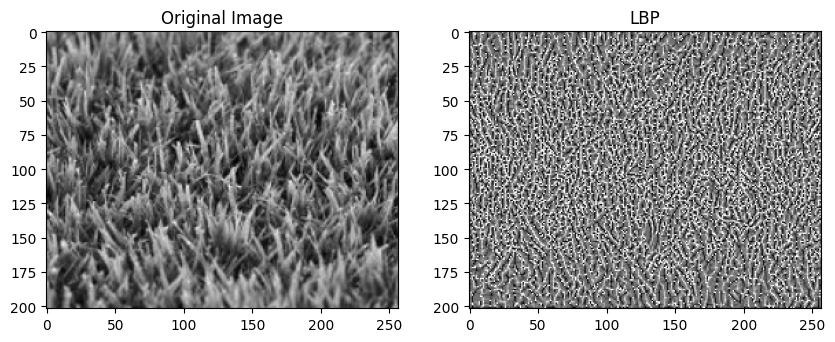

In [ ]:

image = cv2.imread('grama.png', 0)

# Apply Local Binary Pattern (LBP)
lbp = feature.local_binary_pattern(image, P=8, R=1, method='uniform')

# Display the original image and the LBP result
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('LBP')
plt.imshow(lbp, cmap='gray')
plt.show()

In [ ]:
# Função para análise de textura usando OpenCV
def texture_analysis_opencv(image_path):
    image = cv2.imread(image_path, 0)

    # Contraste (usando a variância como uma aproximação)
    contrast = np.var(image)

    # Energia (soma dos quadrados dos valores dos pixels normalizados)
    norm_image = image / 255.0
    energy = np.sum(norm_image ** 2)

    # Homogeneidade (soma das inversas das diferenças de intensidade de pixel)
    homogeneity = np.sum(1.0 / (1.0 + np.abs(np.diff(image.astype(np.float32), axis=0)))) + \
                  np.sum(1.0 / (1.0 + np.abs(np.diff(image.astype(np.float32), axis=1))))

    print(f"Textura da imagem {image_path}:")
    print(f"Contraste (aproximado): {contrast}")
    print(f"Energia: {energy}")
    print(f"Homogeneidade (aproximada): {homogeneity}\n")

# Exemplo de uso
texture_analysis_opencv('gato.png')

Textura da imagem gato.png:
Contraste (aproximado): 7500.483106362886
Energia: 14481.319277201075
Homogeneidade (aproximada): 71751.25



##### Interpretação:

* Contraste: Se uma imagem tiver o valor do contraste maior que outra, isso indica uma maior variação de intensidade na imagem.
* Energia: Uma energia maior indicam uma textura mais uniforme ou repetitiva.
* Homogeneidade: A homogeneidade maior indicam transições mais suaves entre os pixels, sugerindo uma textura mais uniforme.

# 4 Descritivo de Bordas

* A detecção de bordas é usada para identificar as bordas de objetos em uma imagem. O algoritmo Canny é um método popular para detectar bordas.
* Uso: cv2.Canny(image, T_lower, T_upper, aperture_size, L2Gradient)

array([[  0,   0, 255, ...,   0,   0,   0],
       [  0,   0, 255, ...,   0,   0,   0],
       [  0,   0, 255, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)
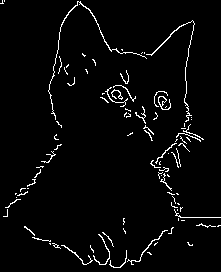

In [ ]:
t_lower = 150  # Lower Threshold
t_upper = 200  # Upper threshold
aperture_size = None  # Aperture size
L2Gradient = False # Boolean
edges = cv2.Canny(cv2.imread('gato.png', 0),t_lower, t_upper,apertureSize=aperture_size, L2gradient = L2Gradient)
edges

In [ ]:
new_size = (15,15)
cat_resized = cv2.resize(cv2.imread('gato.png', 0), new_size)
cat = cv2.Canny(cat_resized,t_lower, t_upper,apertureSize=aperture_size, L2gradient = L2Gradient)
print(cat)


[[  0   0   0   0 255 255 255   0   0   0   0   0   0   0   0]
 [  0   0   0   0 255   0 255   0   0   0   0 255   0   0   0]
 [  0   0   0   0 255   0   0 255   0   0 255 255   0   0   0]
 [  0   0   0 255   0   0   0   0 255 255   0   0 255   0   0]
 [  0   0   0 255   0   0 255   0   0   0   0   0 255   0   0]
 [  0   0   0 255   0   0 255   0   0 255   0   0 255   0   0]
 [  0   0   0 255   0   0   0   0   0 255   0   0 255   0   0]
 [  0   0   0 255   0   0   0   0   0   0   0 255 255   0   0]
 [  0   0   0 255 255   0 255 255 255   0   0 255   0   0   0]
 [  0   0 255 255   0   0   0   0   0   0   0 255   0   0   0]
 [255 255 255   0 255   0   0   0 255 255   0 255   0   0   0]
 [  0   0   0   0   0 255 255   0   0   0   0   0   0 255 255]
 [  0 255 255   0   0   0 255   0   0   0 255 255   0   0   0]
 [255   0   0 255 255 255   0 255 255 255 255   0 255   0   0]
 [255   0   0   0   0 255 255   0   0 255   0   0   0   0   0]]


In [ ]:
# Achatamento da imagem em um vetor.
X = np.array(cat)
cat_images_reshaped = X.reshape(-1)
cat_images_reshaped

array([  0,   0,   0,   0, 255, 255, 255,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0, 255,   0, 255,   0,   0,   0,   0,
       255,   0,   0,   0,   0,   0,   0,   0, 255,   0,   0, 255,   0,
         0, 255, 255,   0,   0,   0,   0,   0,   0, 255,   0,   0,   0,
         0, 255, 255,   0,   0, 255,   0,   0,   0,   0,   0, 255,   0,
         0, 255,   0,   0,   0,   0,   0, 255,   0,   0,   0,   0,   0,
       255,   0,   0, 255,   0,   0, 255,   0,   0, 255,   0,   0,   0,
         0,   0, 255,   0,   0,   0,   0,   0, 255,   0,   0, 255,   0,
         0,   0,   0,   0, 255,   0,   0,   0,   0,   0,   0,   0, 255,
       255,   0,   0,   0,   0,   0, 255, 255,   0, 255, 255, 255,   0,
         0, 255,   0,   0,   0,   0,   0, 255, 255,   0,   0,   0,   0,
         0,   0,   0, 255,   0,   0,   0, 255, 255, 255,   0, 255,   0,
         0,   0, 255, 255,   0, 255,   0,   0,   0,   0,   0,   0,   0,
         0, 255, 255,   0,   0,   0,   0,   0,   0, 255, 255,   

In [ ]:
cat_images_reshaped

array([  0,   0,   0,   0, 255, 255, 255,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0, 255,   0, 255,   0,   0,   0,   0,
       255,   0,   0,   0,   0,   0,   0,   0, 255,   0,   0, 255,   0,
         0, 255, 255,   0,   0,   0,   0,   0,   0, 255,   0,   0,   0,
         0, 255, 255,   0,   0, 255,   0,   0,   0,   0,   0, 255,   0,
         0, 255,   0,   0,   0,   0,   0, 255,   0,   0,   0,   0,   0,
       255,   0,   0, 255,   0,   0, 255,   0,   0, 255,   0,   0,   0,
         0,   0, 255,   0,   0,   0,   0,   0, 255,   0,   0, 255,   0,
         0,   0,   0,   0, 255,   0,   0,   0,   0,   0,   0,   0, 255,
       255,   0,   0,   0,   0,   0, 255, 255,   0, 255, 255, 255,   0,
         0, 255,   0,   0,   0,   0,   0, 255, 255,   0,   0,   0,   0,
         0,   0,   0, 255,   0,   0,   0, 255, 255, 255,   0, 255,   0,
         0,   0, 255, 255,   0, 255,   0,   0,   0,   0,   0,   0,   0,
         0, 255, 255,   0,   0,   0,   0,   0,   0, 255, 255,   

# 5 Descritores HOG (Histogram of Oriented Gradients)

* O HOG é um descritor que captura a distribuição de intensidades de gradientes ou direções de bordas. É frequentemente usado em reconhecimento de objetos.

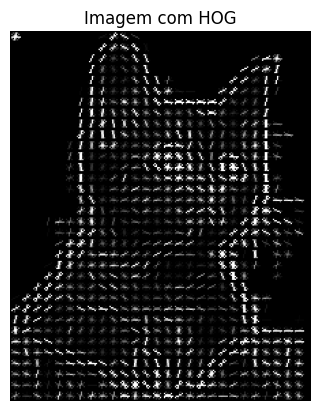

In [ ]:
# Função para calcular e exibir o descritor HOG sobre a imagem
def hog_descriptor(image_path):
    image = cv2.imread(image_path, 0)

    # Calcular o descritor HOG e a imagem HOG
    hog_features, hog_image = hog(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2),
                                  visualize=True, block_norm='L2-Hys')

    # Rescale intensity para melhor visualização
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    # Mostrar a imagem HOG
    plt.imshow(hog_image_rescaled, cmap='gray')
    plt.title('Imagem com HOG')
    plt.axis('off')

    plt.show()

# Exemplo de uso
hog_descriptor('gato.png')


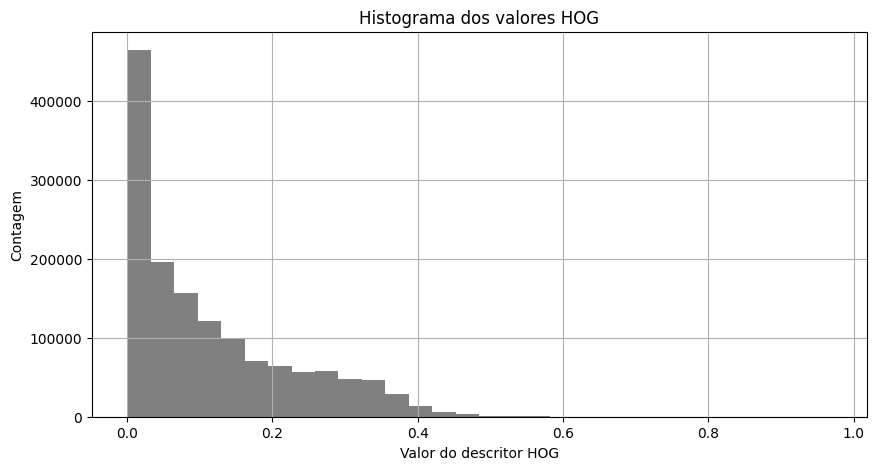

In [ ]:
image = cv2.imread('gato.png', 0)

# Inicializar o descritor HOG
hog = cv2.HOGDescriptor()

# Calcular o HOG
h = hog.compute(image)

# Plot
plt.figure(figsize=(10, 5))
plt.hist(h, bins=30, color='gray')
plt.title('Histograma dos valores HOG')
plt.xlabel('Valor do descritor HOG')
plt.ylabel('Contagem')
plt.grid(True)
plt.show()


# 6. Atividades

### 6.1: Exercício: Comparação de Histogramas
* Como os histogramas podem influenciar a análise da imagem?

In [ ]:
# Função para comparar histogramas de imagens diferentes
def compare_histograms(image_paths):
    plt.figure(figsize=(10, 5))

    for img_path in image_paths:

        # TO DO: leia a imagem e escola um histograma para analise


        plt.plot(hist, label=img_path)

    plt.title('Comparação de Histogramas de Imagens')
    plt.xlabel('Intensidade de Pixel')
    plt.ylabel('Número de Pixels')
    plt.legend(loc='upper right')
    plt.show()

# Exemplo de uso
# path1 = ''
# path2= ''
# image_paths = [path1,path2]
#compare_histograms(image_paths)

Resposta:

### 6.3: Exercício: Aplicação de Filtro Canny
Como o ajuste dos parâmetros do filtro Canny (como threshold1 e threshold2) afeta o número e a clareza das bordas detectadas?

In [ ]:
# Função para detecção de bordas usando Sobel e Canny
def edge_detection(image_path):

    # TO DO: ler imagem e aplicar o filtro canny




    # Exibir resultados
    plt.imshow(edges, cmap='gray')
    plt.title('Detecção de Bordas (Canny)')
    plt.show()

# Exemplo de uso
# path_image = 'gato.png'
# edge_detection(path_image)
